# WeatherPy

Trend 1 Max temperature occurs near equator, latitude did have an impact on temperature

Trend 2 Latitude seems doesn't have an impact on Cloudiness and Hudimity

Trend 3 latitude seems to have some impact on wind speed but less relevant when compare to temperature vs latitude

In [1]:
# Dependencies
import json
import random
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openweathermapy.core as ow
from config import gkey
from citipy import citipy

In [2]:
# Select Random Latitude and Longitude
city = pd.DataFrame()

for x in range (550):
    ran_lats= np.random.uniform(low=-90.000, high=90.000, size=1)
    ran_lngs= np.random.uniform(low=-180.000, high=180.000, size=1)
    ran_city = pd.DataFrame([[ran_lats, ran_lngs]],columns = ["ran_lats", "ran_lngs"]).astype(float)
    city=city.append(ran_city)
new_city=city.reset_index()
new_city.head()

,index,ran_lats,ran_lngs
0,0,86.346409,20.269960
1,0,30.525635,64.346766
2,0,70.278980,170.526909
3,0,-60.464217,-44.400695
4,0,-79.209014,140.305761


In [3]:
# Find Nearby City Name
for n in range(0, len(new_city)):
    city_lat = new_city.loc[n]["ran_lats"]
    city_lngs = new_city.loc[n]["ran_lngs"]
    city = citipy.nearest_city(city_lat, city_lngs)
    new_city.set_value(n, "City Name", city.city_name.title())
    new_city.set_value(n, "Country", city.country_code.upper())
new_city1=new_city.drop("index", axis=1)
new_city1.head()

,ran_lats,ran_lngs,City Name,Country
0,86.346409,20.269960,Longyearbyen,SJ
1,30.525635,64.346766,Geresk,AF
2,70.278980,170.526909,Pevek,RU
3,-60.464217,-44.400695,Ushuaia,AR
4,-79.209014,140.305761,Hobart,AU


In [4]:
# Create blank columns for necessary fields
new_city1["Lat"] = ""
new_city1["Lng"] = ""

# Counter
row_count = 0

# Loop through and grab the lat/lng using Google maps
for index, row in new_city1.iterrows():
    
    # Create endpoint URL
    params = {
        "address": row["City Name"],
        "key": gkey
    }
    target_url = "https://maps.googleapis.com/maps/api/geocode/json"
    
    # Print log to ensure loop is working correctly
    print("Now retrieving city # " + str(row_count))
    print(target_url)
    row_count += 1
    
    # Run requests to grab the JSON at the requested URL
    city_location = requests.get(target_url, params=params).json()
    
    # Append the lat/lng to the appropriate columns
    # Use try / except to skip any cities with errors
    try: 
        city_lat = city_location["results"][0]["geometry"]["location"]["lat"]
        city_lng = city_location["results"][0]["geometry"]["location"]["lng"]
        
        new_city1.set_value(index, "Lat", city_lat)
        new_city1.set_value(index, "Lng", city_lng)
        
    except:
        print("Error with city data. Skipping")
        continue
        
# Visualize
new_city1.head()

Now retrieving city # 0
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 1
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 2
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 3
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 4
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 5
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 6
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 7
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 8
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 9
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 10
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 11
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 12
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 13
https://ma

Now retrieving city # 111
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 112
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 113
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 114
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 115
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 116
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 117
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 118
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 119
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 120
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 121
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 122
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 123
https://maps.googleapis.com/maps/api/geocode/json
Now retrievi

Now retrieving city # 219
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 220
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 221
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 222
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 223
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 224
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 225
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 226
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 227
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 228
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 229
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 230
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 231
https://maps.googleapis.com/maps/api/geocode/json
Now retrievi

Now retrieving city # 328
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 329
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 330
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 331
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 332
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 333
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 334
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 335
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 336
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 337
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 338
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 339
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 340
https://maps.googleapis.com/maps/api/geocode/json
Now retrievi

Now retrieving city # 436
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 437
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 438
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 439
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 440
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 441
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 442
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 443
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 444
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 445
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 446
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 447
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 448
https://maps.googleapis.com/maps/api/geocode/json
Now retrievi

Now retrieving city # 544
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 545
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 546
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 547
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 548
https://maps.googleapis.com/maps/api/geocode/json
Now retrieving city # 549
https://maps.googleapis.com/maps/api/geocode/json


,ran_lats,ran_lngs,City Name,Country,Lat,Lng
0,86.346409,20.269960,Longyearbyen,SJ,78.2232,15.6267
1,30.525635,64.346766,Geresk,AF,31.8299,64.5681
2,70.278980,170.526909,Pevek,RU,69.6929,170.4
3,-60.464217,-44.400695,Ushuaia,AR,-54.8019,-68.303
4,-79.209014,140.305761,Hobart,AU,41.5323,-87.255


# API call on Openweather

In [5]:
# Create an empty column for temp, max temp, clouds, humidity, wind_speed
api_key = "c7f9f57b4779391ea1f5ae067591c971"
new_city1["temp"] =""
new_city1["max_temp"]=""
new_city1["clouds"]=""
new_city1["humidity"]=""
new_city1["wind_speed"]=""


# Counter
row_count = 0

# Loop through and run openweahter find data for the empty column
for index, row in new_city1.iterrows():
    # Create endpoint url
    params = {
    "q": new_city1.loc[index]["City Name"]+","+ new_city1.loc[index]["Country"],
    "units": "IMPERIAL",
    "mode": "json",
    "appid": api_key}

    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    
    # This link helps to handily see the JSON generated for each query
    print("Now retrieving city #%s: %s" % (row_count, new_city1.loc[index]["City Name"]))
    row_count += 1 
    print(base_url)
    
    # Run a request to grab the JSON at the base URL
    city_data = requests.get(base_url, params=params).json()
    try: 
        city_temp = city_data["main"]["temp"]
        city_max = city_data["main"]["temp_max"]
        city_cloud = city_data['clouds']['all']
        city_hum = city_data['main']['humidity']
        city_wind = city_data['wind']['speed']
       
        new_city1.set_value(index, "temp", city_temp)
        new_city1.set_value(index, "max_temp", city_max)
        new_city1.set_value(index, "clouds", city_cloud)
        new_city1.set_value(index, "humidity", city_hum)
        new_city1.set_value(index, "wind_speed", city_wind)
        
    except:
        print("Error with city data. Skipping")
        continue 
    
# Visualize
new_city1.head()

Now retrieving city #0: Longyearbyen
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #1: Geresk
http://api.openweathermap.org/data/2.5/weather?
Error with city data. Skipping
Now retrieving city #2: Pevek
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #3: Ushuaia
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #4: Hobart
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #5: Mungwi
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #6: Cape Town
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #7: Kruisfontein
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #8: Itaituba
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #9: Barentsburg
http://api.openweathermap.org/data/2.5/weather?
Error with city data. Skipping
Now retrieving city #10: Port Alfred
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #11: Cape Town
http:/

Error with city data. Skipping
Now retrieving city #95: Yellowknife
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #96: Belushya Guba
http://api.openweathermap.org/data/2.5/weather?
Error with city data. Skipping
Now retrieving city #97: Nikolskoye
http://api.openweathermap.org/data/2.5/weather?
Error with city data. Skipping
Now retrieving city #98: Jamestown
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #99: Bethel
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #100: Mataura
http://api.openweathermap.org/data/2.5/weather?
Error with city data. Skipping
Now retrieving city #101: East London
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #102: Hobart
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #103: Taoudenni
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #104: Aguililla
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #105: Cape Town
http

Now retrieving city #188: Avarua
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #189: Ribeira Grande
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #190: Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #191: Khatanga
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #192: Kapaa
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #193: New Norfolk
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #194: Tuatapere
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #195: New Norfolk
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #196: Saint George
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #197: Mar Del Plata
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #198: Avarua
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #199: Vanavara
http://api.openweathermap.org/dat

Now retrieving city #282: Aykhal
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #283: Ballina
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #284: Cidreira
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #285: Henties Bay
http://api.openweathermap.org/data/2.5/weather?
Error with city data. Skipping
Now retrieving city #286: Grand Gaube
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #287: Lorengau
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #288: Prabumulih
http://api.openweathermap.org/data/2.5/weather?
Error with city data. Skipping
Now retrieving city #289: Sinnamary
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #290: Ponta Do Sol
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #291: Avarua
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #292: Albany
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city

Now retrieving city #375: Tumannyy
http://api.openweathermap.org/data/2.5/weather?
Error with city data. Skipping
Now retrieving city #376: Salalah
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #377: Sao Filipe
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #378: Kewanee
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #379: Aasiaat
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #380: Vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #381: Kapaa
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #382: Georgetown
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #383: Hobart
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #384: Albany
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #385: Port Alfred
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #386: Ambagarh Chauki
http://api.

Now retrieving city #470: Khatanga
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #471: Hithadhoo
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #472: Barrow
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #473: Vaini
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #474: Ushuaia
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #475: Albany
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #476: Mataura
http://api.openweathermap.org/data/2.5/weather?
Error with city data. Skipping
Now retrieving city #477: Palmer
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #478: Kidal
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #479: Hobart
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #480: Caravelas
http://api.openweathermap.org/data/2.5/weather?
Now retrieving city #481: Otane
http://api.openweathermap.org/data/2.5

,ran_lats,ran_lngs,City Name,Country,Lat,Lng,temp,max_temp,clouds,humidity,wind_speed
0,86.346409,20.269960,Longyearbyen,SJ,78.2232,15.6267,23,23,40,73,13.87
1,30.525635,64.346766,Geresk,AF,31.8299,64.5681,,,,,
2,70.278980,170.526909,Pevek,RU,69.6929,170.4,25.57,25.57,88,86,15.46
3,-60.464217,-44.400695,Ushuaia,AR,-54.8019,-68.303,33.8,33.8,75,100,24.16
4,-79.209014,140.305761,Hobart,AU,41.5323,-87.255,59,59,0,77,6.93


In [6]:
# Save the DataFrame as a csv
new_city1.to_csv("city_weather_data.csv", encoding="utf-8", index=False)

In [7]:
# Display the City Data Frame
city_data1=new_city1
city_data1.head()

,ran_lats,ran_lngs,City Name,Country,Lat,Lng,temp,max_temp,clouds,humidity,wind_speed
0,86.346409,20.269960,Longyearbyen,SJ,78.2232,15.6267,23,23,40,73,13.87
1,30.525635,64.346766,Geresk,AF,31.8299,64.5681,,,,,
2,70.278980,170.526909,Pevek,RU,69.6929,170.4,25.57,25.57,88,86,15.46
3,-60.464217,-44.400695,Ushuaia,AR,-54.8019,-68.303,33.8,33.8,75,100,24.16
4,-79.209014,140.305761,Hobart,AU,41.5323,-87.255,59,59,0,77,6.93


In [8]:
city_data2=city_data1.drop(['ran_lats', 'ran_lngs'], axis=1)
city_data2.head()

,City Name,Country,Lat,Lng,temp,max_temp,clouds,humidity,wind_speed
0,Longyearbyen,SJ,78.2232,15.6267,23,23,40,73,13.87
1,Geresk,AF,31.8299,64.5681,,,,,
2,Pevek,RU,69.6929,170.4,25.57,25.57,88,86,15.46
3,Ushuaia,AR,-54.8019,-68.303,33.8,33.8,75,100,24.16
4,Hobart,AU,41.5323,-87.255,59,59,0,77,6.93


In [9]:
# Save new DataFrame as a csv
city_data2.to_csv("city_weather_data2.csv", encoding="utf-8", index=False)

In [10]:
# read new data
weather_df = pd.read_csv("city_weather_data2.csv")

In [11]:
# check data types
weather_df.dtypes

City Name      object
Country        object
Lat           float64
Lng           float64
temp          float64
max_temp      float64
clouds        float64
humidity      float64
wind_speed    float64
dtype: object

In [12]:
# drop NA column
newweather_df = weather_df.dropna(how='any')
newweather_df.count()

City Name     472
Country       472
Lat           472
Lng           472
temp          472
max_temp      472
clouds        472
humidity      472
wind_speed    472
dtype: int64

# Latitude vs Temperature Plot

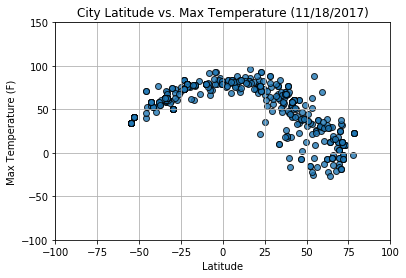

In [13]:
# Build a scatter plot for each data type
plt.scatter(newweather_df['Lat'], 
            newweather_df['max_temp'],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (11/18/2017)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-100, 150])

# Save the figure
plt.savefig("Max_Temp_Latitude.png")

# Show plot
plt.show()

# Latitude vs. Humidity Plot

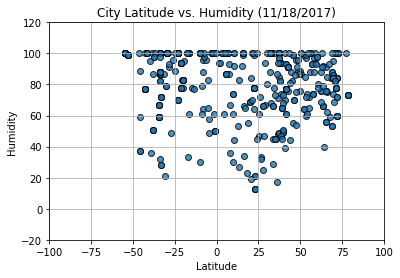

In [14]:
# Build a scatter plot for each data type
plt.scatter(newweather_df['Lat'], 
            newweather_df['humidity'],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (11/18/2017)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-20, 120])

# Save the figure
plt.savefig("Humidity_Latitude.png")

# Show plot
plt.show()

# Latitude vs. Cloudiness Plot

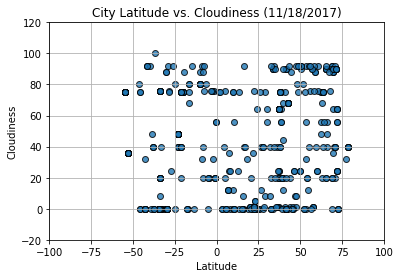

In [15]:
# Build a scatter plot for each data type
plt.scatter(newweather_df['Lat'], 
            newweather_df['clouds'],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (11/18/2017)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-20, 120])

# Save the figure
plt.savefig("Cloudiness_Latitude.png")

# Show plot
plt.show()

# Latitude vs. Wind Speed Plot

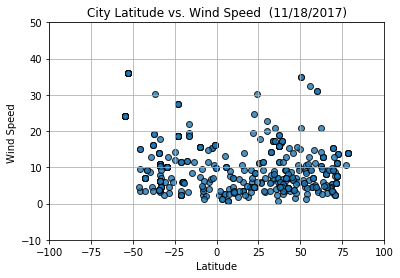

In [16]:
# Build a scatter plot for each data type
plt.scatter(newweather_df['Lat'], 
            newweather_df['wind_speed'],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed  (11/18/2017)")
plt.ylabel("Wind Speed ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-10, 50])

# Save the figure
plt.savefig("Wind Speed_Latitude.png")

# Show plot
plt.show()

# END